# Preprocessing

In [1]:
# import library
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

Load data

In [2]:
raw_df = pd.read_csv('data/crawl_data.csv')

# Data overview


Let's provide a brief introduction to the dataset and explain the meaning of each column.

In [3]:
raw_df.shape

(2293, 46)

In [4]:
raw_df.head(5)

,Unnamed: 0,CARNAME,ID,Make,Model,Body color,Type of finish,Interior color,Interior material,Body,...,Battery capacity,Hybrid type,Electric range,Warranty until,Weight,Country of origin,Secondary drive,Energy efficiency,Full service history,Battery capacity1
0,0,hyundai kona,61032325,Hyundai,Kona,Grey,Metallic,Black interior,Full leather interior,SUV / offroad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,volkswagen up!,61032250,Volkswagen,up!,Black,NaN,Other interior color,Cloth interior,Hatchback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,seat ibiza,61032203,Seat,Ibiza,Black,Metallic,Grey interior,Cloth interior,Hatchback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ford kuga,61032104,Ford,Kuga,Silver,Metallic,Black interior,Cloth interior,SUV / offroad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,dodge nitro,61032099,Dodge,Nitro,White,NaN,Black interior,Full leather interior,SUV / offroad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<h2> Explain the meaning of each column </h2>

- **Unnamed: 0**: the index of original data
- **CARNAME**: name of the car
- **ID**: id of the car
- **Make**: brand that the car is made
- **Model**: model of the car
- **Body color**: body/exterior color of the car
- **Type of finish**: the paint finish or coating applied to the vehicle. 
    - Ex: Metallic finish is a type of paint that contains small metallic particles, typically aluminum flakes, which give the paint a shiny and reflective appearance.
- **Interior color**: color of the car's interior
- **Interior material**: materials used to construct the interior components of the vehicle, typically Leather,Cloth,Alcantara(high-end) 
- **Body**: body style or the overall design and structure of the vehicle (Sedan, SUV, MPV,...)
- **Doors**: number of doors on a vehicle. 4/5 means that a car has 4 main doors (two front doors and two rear doors) and a rear hatch/liftgate
- **Seats**: number of seating positions available for occupants.
- **VIN**: (Vehicle Identification Number) - A unique code assigned to every motor vehicle when it's manufactured, used for identification purposes.
- **Fuel**: the type of fuel the vehicle uses, such as gasoline, diesel, electric, hybrid, etc
- **Transmission**: The type of transmission system the vehicle has, such as automatic, manual, or semi-automatic.
- **Drive type**: Specifies whether the vehicle is front-wheel drive (FWD), rear-wheel drive (RWD), or all-wheel drive (AWD).
- **Power**:  total power output of the vehicle's engine or powertrain, often measured in horsepower (hp) or kilowatts (kW).
- **El. motor power**: The power output of the electric motor in electric or hybrid vehicles.
- **CO2 emissions**: The amount of carbon dioxide emitted by the vehicle, measured in grams per kilometer (g/km).
- **Emission class**: The vehicle's emission standard, indicating its compliance with environmental regulations.
- **Battery type**: The type of battery used in electric or hybrid vehicles, such as lithium-ion.
- **AC charging time**: The time (hour) it takes to charge the vehicle's battery using alternating current (AC).
- **DC charging time**: The time (hour) it takes to charge the vehicle's battery using direct current (DC).
- **Battery warranty (km)**: The distance (in kilometers) covered by the warranty for the vehicle's battery.
- **Range extender**:  A feature in some electric vehicles that includes a backup power source (usually a small internal combustion engine) to extend the vehicle's range.
- **Mileage**: The total distance the vehicle has traveled, often measured in miles or kilometers.
- **First registration**: The date when the vehicle was first registered.
- **Condition**: The overall state or condition of the vehicle, such as new or used.
- **Consumption**: The fuel or energy consumption of the vehicle, often expressed in liters per 100 kilometers or miles per gallon.
- **Price**: The selling price of the vehicle.
- **Currency**: The currency in which the vehicle's price is quoted.
- **Tags**: Special features/function that are equipped on the car.
- **Engine capacity**: The total volume of all the cylinders in the engine (ccm).
- **Valid MOT until**: The date until which the vehicle's Ministry of Transport (MOT) certification is valid.
- **Previous owners**: The number of individuals or entities that have owned the vehicle before the current owner.
- **Engine power**: The power output of the vehicle's electric engine.
- **Battery capacity**: The total energy storage capacity of the vehicle's battery (kWh).
- **Hybrid type**: The specific type of hybrid technology employed by the vehicle, such as parallel hybrid or series hybrid.
- **Electric range**: The distance the vehicle can travel on electric power alone.
- **Warranty until**: The date until which the vehicle is covered by a warranty.
- **Weight**: The total weight of the vehicle, often measured in kilograms or pounds.
- **Country of origin**: The country where the vehicle was manufactured.
- **Secondary drive**: Additional features related to the vehicle's drive system, such as a secondary electric motor in hybrid vehicles.
- **Energy efficiency**:  The efficiency of the vehicle in converting energy into motion.
- **Full service history**: Documentation of all the services and maintenance performed on the vehicle.
- **Battery capacity1**: The total energy storage capacity of the vehicle's battery (Ah) (Ampere-hour).

# Data cleaning

## Check for Duplicates

Let's check for and handle duplicate rows in the dataset.

In [5]:
#TODO
duplicate_rows = raw_df[raw_df.duplicated()]
# print duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Unnamed: 0, CARNAME, ID, Make, Model, Body color, Type of finish, Interior color, Interior material, Body, Doors, Seats, VIN, Fuel, Transmission, Drive type, Power, El. motor power, CO2 emissions, Emission class, Battery type, AC charging time, DC charging time, Battery warranty (km), Range extender, Mileage, First registration, Condition, Consumption, Price, Currency, Tags, Engine capacity, Valid MOT until, Previous owners, Engine power, Battery capacity, Hybrid type, Electric range, Warranty until, Weight, Country of origin, Secondary drive, Energy efficiency, Full service history, Battery capacity1]
Index: []

[0 rows x 46 columns]


As we can see, there is no duplicated rows. This is expected because we get data for different links.

## Analyzing Data in Columns
Next, we will analyze and process the data in the columns of the crawled dataset.

- First, we calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [6]:
#TODO
dtypes = raw_df.dtypes
dtypes

Unnamed: 0                 int64
CARNAME                   object
ID                         int64
Make                      object
Model                     object
Body color                object
Type of finish            object
Interior color            object
Interior material         object
Body                      object
Doors                     object
Seats                     object
VIN                       object
Fuel                      object
Transmission              object
Drive type                object
Power                     object
El. motor power           object
CO2 emissions             object
Emission class            object
Battery type              object
AC charging time          object
DC charging time          object
Battery warranty (km)     object
Range extender            object
Mileage                   object
First registration        object
Condition                 object
Consumption               object
Price                      int64
Currency  

### Remove Columns with High Missing Values and unnecessary columns

- We need to check the data in the columns of the dataset.

In [7]:
df = raw_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2293 non-null   int64  
 1   CARNAME                2293 non-null   object 
 2   ID                     2293 non-null   int64  
 3   Make                   2293 non-null   object 
 4   Model                  2293 non-null   object 
 5   Body color             2111 non-null   object 
 6   Type of finish         1204 non-null   object 
 7   Interior color         1894 non-null   object 
 8   Interior material      1930 non-null   object 
 9   Body                   2293 non-null   object 
 10  Doors                  2272 non-null   object 
 11  Seats                  2080 non-null   object 
 12  VIN                    2293 non-null   object 
 13  Fuel                   2293 non-null   object 
 14  Transmission           2293 non-null   object 
 15  Driv

In [8]:
# Tính tỷ lệ giá trị bị thiếu cho mỗi cột
missing_ratio = df.isnull().mean() * 100

# Lọc ra các cột có tỷ lệ giá trị bị thiếu lớn hơn 60%
missing_column = missing_ratio[missing_ratio > 60]

# In ra tên cột và tỷ lệ giá trị bị thiếu tương ứng
for column_name, missing_percent in missing_column.items():
    print(f"'{column_name}': {missing_percent}%")


'El. motor power': 94.85390318360227%
'Battery type': 93.63279546445705%
'AC charging time': 95.42084605320541%
'DC charging time': 97.68861753161798%
'Battery warranty (km)': 95.68251199302225%
'Range extender': 86.21892716964675%
'Valid MOT until': 88.39947666812037%
'Engine power': 97.73222852158744%
'Battery capacity': 92.2808547754034%
'Hybrid type': 92.62974269515918%
'Electric range': 98.77889228085478%
'Warranty until': 86.39337112952464%
'Weight': 75.40340165721761%
'Country of origin': 87.83253379851723%
'Secondary drive': 99.56389010030527%
'Energy efficiency': 99.78194505015264%
'Full service history': 99.65111208024422%
'Battery capacity1': 99.91277802006105%


Due to the significantly lower reporting of electric vehicles compared to other types of vehicles, there is a substantial amount of missing data for certain attributes exclusive to electric cars.

Primarily, we will address general information columns present in all types of vehicles.

- There are many columns with more than *60%* missing data, such as `Engine power`, `Full service history`, `Hybrid type`, ... Therefore, the columns with a high percentage of missing data will be removed before processing the data.

In [9]:
missing_column = missing_column.index

#Loại trừ ra 
electric_vehicle_columns = [
    'El. motor power',
    'Battery type',
    'AC charging time',
    'DC charging time',
    'Battery warranty (km)',
    'Battery capacity',
    'Electric range',
    'Battery capacity1'
]

missing_column = missing_column.drop(electric_vehicle_columns )
df = df.drop(missing_column, axis = 1)

- Removing unnecessary columns:
    - `Unnamed:0`: the index number    
    - `Currency`: the currency unit, which is EUR for all entries
    Therefore, we will also remove these columns from the dataset.

In [10]:
df = df.drop(['Currency','Unnamed: 0'], axis = 1)

Next, we will examine the missing value rates within the primary columns related to electric vehicles. We need to assess how these columns perform in terms of missing values when considering only the subset of electric vehicles. This evaluation will help determine whether these columns can be effectively utilized for analysis.

In [11]:
# Lọc ra xe điện từ df
df_electric = df[df['Fuel'] == 'Electric']

# Tính toán tỷ lệ phần trăm giá trị bị thiếu cho từng cột
missing_values_total = df[electric_vehicle_columns].isnull().mean() * 100
missing_values_electric = df_electric[electric_vehicle_columns].isnull().mean() * 100

# Tạo biểu đồ
fig = go.Figure()

fig.add_trace(go.Bar(
    x=electric_vehicle_columns,
    y=missing_values_total,
    name='Tổng thể',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=electric_vehicle_columns,
    y=missing_values_electric,
    name='Xe điện',
    marker_color='lightsalmon'
))

# Điều chỉnh giao diện
fig.update_layout(
    title='Phần trăm giá trị bị thiếu theo từng cột',
    xaxis_title='Tên cột',
    yaxis_title='Phần trăm giá trị bị thiếu',
    barmode='group'
)

fig.show()


It can be observed that the missing data in these columns is excessively large for the entire dataset and specifically for the electric vehicle subset. Therefore, the contribution of data from these columns is not substantial enough. Consequently, it is necessary to drop these columns.

In [12]:
df = df.drop(electric_vehicle_columns, axis = 1)

### Convert Data Type of Columns

- After removing the columns with missing data and unnecessary columns, we need to process the data in the remaining columns. In this section, we will proceed with data processing in these columns.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CARNAME             2293 non-null   object 
 1   ID                  2293 non-null   int64  
 2   Make                2293 non-null   object 
 3   Model               2293 non-null   object 
 4   Body color          2111 non-null   object 
 5   Type of finish      1204 non-null   object 
 6   Interior color      1894 non-null   object 
 7   Interior material   1930 non-null   object 
 8   Body                2293 non-null   object 
 9   Doors               2272 non-null   object 
 10  Seats               2080 non-null   object 
 11  VIN                 2293 non-null   object 
 12  Fuel                2293 non-null   object 
 13  Transmission        2293 non-null   object 
 14  Drive type          2293 non-null   object 
 15  Power               2293 non-null   object 
 16  CO2 em

- There are some columns with invalid data types.
- The columns `Engine capacity`, `Power`, `Battery warranty (km)`, `Mileage`, `Battery capacity`, `CO2 emissions`, `AC charging time`, `DC charging time` and `Seats` should be converted to `int` or `float` data types instead of `string`. Therefore, we will process the data strings to convert them into numerical data types.

In [14]:
#TODO
column_convert_to_numeric = ['Engine capacity','Power', 'Consumption','Mileage', 'CO2 emissions']
def convert_to_int(column):
    for i in range(len(column)):
        value = column[i]
        if pd.notnull(value):
            column[i] = value.split(' ')[0].strip().replace('\xa0', '')
    column = pd.to_numeric(column, errors='coerce')
    return column
    
# Convert specified columns 
df[column_convert_to_numeric] = df[column_convert_to_numeric].apply(convert_to_int)
# Convert 'Seats' column 
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce')

In [15]:
# Rename the columns
new_column_names = {'Engine capacity': 'Engine capacity(ccm)',
                    'Price': 'Price(EUR)',
                    'Power': 'Power(kW)',
                    'Mileage': 'Mileage(km)',
                    'Consumption':'Consumption(l/100km or kWh/100km)',
                    'CO2 emissions': 'CO2 emissions(g/km)'}
df = df.rename(columns=new_column_names)

Process the columns that store month/year data as strings to datetime: 
- First registration
- Warranty until

In [16]:
# def convert_to_datetime(date_str):
#     if pd.notnull(date_str):
#         date_format = "%b-%y"
#         date_obj = datetime.strptime(date_str, date_format)
#         return date_obj
#     else:
#         return pd.NaT
# convert_column = ['First registration', 'Warranty until']
# df[convert_column] = df[convert_column].applymap(convert_to_datetime)

In [17]:
# After converting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CARNAME                            2293 non-null   object 
 1   ID                                 2293 non-null   int64  
 2   Make                               2293 non-null   object 
 3   Model                              2293 non-null   object 
 4   Body color                         2111 non-null   object 
 5   Type of finish                     1204 non-null   object 
 6   Interior color                     1894 non-null   object 
 7   Interior material                  1930 non-null   object 
 8   Body                               2293 non-null   object 
 9   Doors                              2272 non-null   object 
 10  Seats                              2066 non-null   float64
 11  VIN                                2293 non-null   objec

- Now the data types of the columns are more appropriate. The next step is to examine the distribution of data in the numerical and categorical columns.

### Process numerical columns

- Filter out the columns that contain numerical data. Calculate the missing data rate for each column.

In [18]:
numeric_df = df.select_dtypes(include=np.number)
missing_percentage = numeric_df.isnull().mean()

print('The percentage of missing values:')
for idx, missing in zip(missing_percentage.index, missing_percentage): 
    print(f'- {idx}: {round(missing * 100, 2)}%')

The percentage of missing values:
- ID: 0.0%
- Seats: 9.9%
- Power(kW): 0.0%
- CO2 emissions(g/km): 0.0%
- Mileage(km): 0.0%
- Consumption(l/100km or kWh/100km): 11.69%
- Price(EUR): 0.0%
- Engine capacity(ccm): 10.95%
- Previous owners: 59.35%


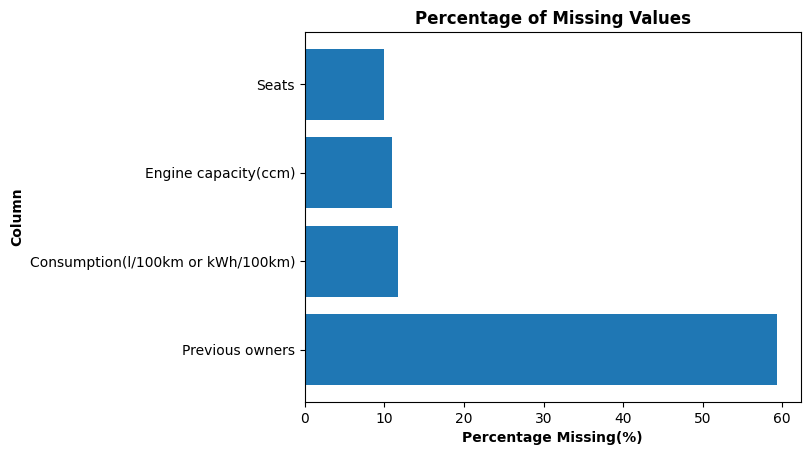

In [19]:
# Lọc các cột có giá trị thiếu lớn hơn 0
missing_percentage_filtered = missing_percentage[missing_percentage > 0].sort_values(ascending = False)
# Vẽ bar chart
plt.barh(missing_percentage_filtered.index, missing_percentage_filtered*100)

# Đặt tiêu đề
plt.title('Percentage of Missing Values', fontweight='bold')

# Đặt nhãn trục x
plt.xlabel('Percentage Missing(%)', fontweight='bold')

# Đặt nhãn trục y
plt.ylabel('Column', fontweight='bold')

# Hiển thị biểu đồ
plt.show()

- For the column `Previous owners`, which indicates whether the car has been previously owned or not, the missing values can be replaced with 0, assuming that the missing values correspond to cars that are brand new.
- The missing values in the columnst `Seats` and `Engine capacity`will be replaced with the median value.
- The missing data in the `Consumption` column will be filled with the mode value within each `Fuel` group.

In [20]:
df['Previous owners'] = df['Previous owners'].fillna(0)

# Xử lí missing values cột Seats
median_seats = df['Seats'].median()
df['Seats'] = df['Seats'].fillna(median_seats)

# Xử lí missing values cột Engine capacity
median_engine_capacity = df['Engine capacity(ccm)'].median()
df['Engine capacity(ccm)'] = df['Engine capacity(ccm)'].fillna(median_engine_capacity)


# Xử lí missing values cột Consumption
df['Consumption(l/100km or kWh/100km)'] = df.groupby('Fuel')['Consumption(l/100km or kWh/100km)'].transform(lambda x: x.fillna(x.mode()[0]))

- Calculate the missing values again and save them into the `missing_percentages` variable.

In [21]:
numeric_df = df.select_dtypes(include=np.number)
missing_percentage = numeric_df.isnull().mean()

print('The percentage of missing values:')
for idx, missing in zip(missing_percentage.index, missing_percentage): 
    print(f'- {idx}: {round(missing * 100, 2)}%')

The percentage of missing values:
- ID: 0.0%
- Seats: 0.0%
- Power(kW): 0.0%
- CO2 emissions(g/km): 0.0%
- Mileage(km): 0.0%
- Consumption(l/100km or kWh/100km): 0.0%
- Price(EUR): 0.0%
- Engine capacity(ccm): 0.0%
- Previous owners: 0.0%


- Now let's examine the distribution of data in the numerical columns. We will calculate percentiles with values of 0% (min), 25%, 50%, 75%, and 100% (max) to see how the data is distributed. The results will be saved in the `numeric_col_profile` variable.

In [22]:
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_col_profile = df[numeric_columns].describe().loc[["min", "25%", "50%", "75%", "max"]]
numeric_col_profile 

,ID,Seats,Power(kW),CO2 emissions(g/km),Mileage(km),Consumption(l/100km or kWh/100km),Price(EUR),Engine capacity(ccm),Previous owners
min,61021609.0,2.0,33.0,0.0,0.0,0.0,5399.0,1.0,0.0
25%,61022468.0,5.0,85.0,97.0,150.0,4.6,20899.0,1332.0,0.0
50%,61023366.0,5.0,110.0,117.0,25000.0,5.3,29399.0,1499.0,0.0
75%,61024207.0,5.0,150.0,137.0,62000.0,6.0,42199.0,1968.0,1.0
max,61032325.0,7.0,750.0,394.0,174215.0,32.0,692499.0,6749.0,5.0


- The distribution of the numerical columns seems to be normal, except for the minimum value of the`Engine capacity(ccm)` column which appears to be a bit unusual.

#### Handle outlier

In ra thông tin các xe nghi ngờ là lỗi

In [23]:
#Xem thông tin của xe có Engine capacity(ccm) < 800
df[df['Engine capacity(ccm)'] < 800]

,CARNAME,ID,Make,Model,Body color,Type of finish,Interior color,Interior material,Body,Doors,...,CO2 emissions(g/km),Emission class,Mileage(km),First registration,Condition,Consumption(l/100km or kWh/100km),Price(EUR),Tags,Engine capacity(ccm),Previous owners
771,opel vivaro,61023923,Opel,Vivaro,NaN,NaN,Other interior color,Other interior material,Cargo VAN,NaN,...,163,No emission class,90302,10/2018,Used,6.1,29199,Navigation system; Bluetooth; Side mirrors wit...,1.0,0.0
1280,hyundai ioniq-6,61023153,Hyundai,Ioniq 6,NaN,NaN,Black interior,Full leather interior,Sedans / saloons,4/5 doors,...,0,Euro 6d-TEMP,16500,2/2023,Demonstration car,0.0,53249,Ventilated front seats; Heated rear seats; Par...,1.0,1.0
1576,toyota land-cruiser,61022684,Toyota,Land Cruiser,Silver,Metallic,Black interior,Full leather interior,SUV / offroad,4/5 doors,...,206,Euro 6,0,9/2023,New,7.6,82749,Ventilated front seats; Air suspension; LED he...,280.0,0.0
2131,mercedes-benz eqb,61021851,Mercedes-Benz,EQB,Black,NaN,Other interior color,Other interior material,SUV / offroad,4/5 doors,...,0,No emission class,5000,12/2022,Used,0.0,50599,LED headlights; Digital cockpit; Keyless entry...,1.0,0.0


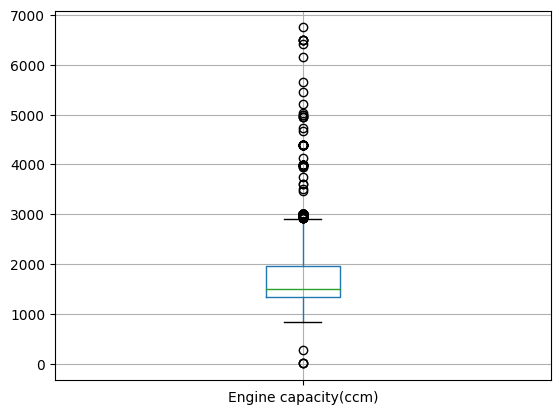

In [24]:
# Sử dụng phương thức .boxplot()
df.boxplot(column='Engine capacity(ccm)')
plt.show()


Sau khi nghiên cứu và tìm kiếm trên google, các dòng xe trên đều có engine câpbility lớn hơn 1. Và minimum enginer capacity là 1000 => đây là lỗi nhập liệu của trang web, có thể drop nó

In [25]:
#xoá các xe có enginer capacity == 1
df = df[df['Engine capacity(ccm)'] >= 800]

### Processing categorical columns

Chúng ta sẽ xem xét các cột categorical xem tỉ lệ missing value của các cột này như thế nào?

In [26]:
# Lấy ra các cột object xem tỉ lệ misisng value
cate_col = df.select_dtypes(include=['object']).columns

# Tính tỉ lệ mising của mỗi cột
missing_values = (df[cate_col].isnull().mean() * 100)
missing_values = missing_values.sort_values(ascending=True)

fig = go.Figure(data=[go.Bar(
    y=missing_values.index,
    x=missing_values.values,
    orientation='h',
    marker_color='#1f77b4'
)])

fig.update_layout(
    title_text='Phần trăm giá trị bị thiếu của mỗi cột',
    xaxis_title='Phần trăm giá trị bị thiếu',
    yaxis_title='Tên cột',
    yaxis={'autorange': 'reversed'},
    height=800
)

fig.show()


Ta sẽ điền các giá trị còn thiếu Condition dựa trên Mileage.
- Nếu mileage =< 300 => Condition = 'New'
- Nếu mileage > 1000 => Condition = 'Used'

In [27]:
df.loc[df['Mileage(km)'] <= 300, 'Condition'] = df.loc[df['Mileage(km)'] <= 300, 'Condition'].fillna('New')
df.loc[df['Mileage(km)'] > 300, 'Condition'] = df.loc[df['Mileage(km)'] > 300, 'Condition'].fillna('Used')

Tiếp theo, ta sẽ điền vào các giá trị thiếu còn lại với mode của mỗi cột

In [28]:
#Tiếp theo, ta sẽ điền vào các giá trị thiếu còn lại với mode của mỗi cột
fill_with_mode = ['Body color','Doors', 'Tags', 'Emission class','Interior color', 'Interior material', 'Type of finish']

for column in fill_with_mode:
    df[column].fillna(df[column].mode()[0], inplace=True)

Sau khi đã điền xong, ta có thể quan sát phân phối của mỗi cột

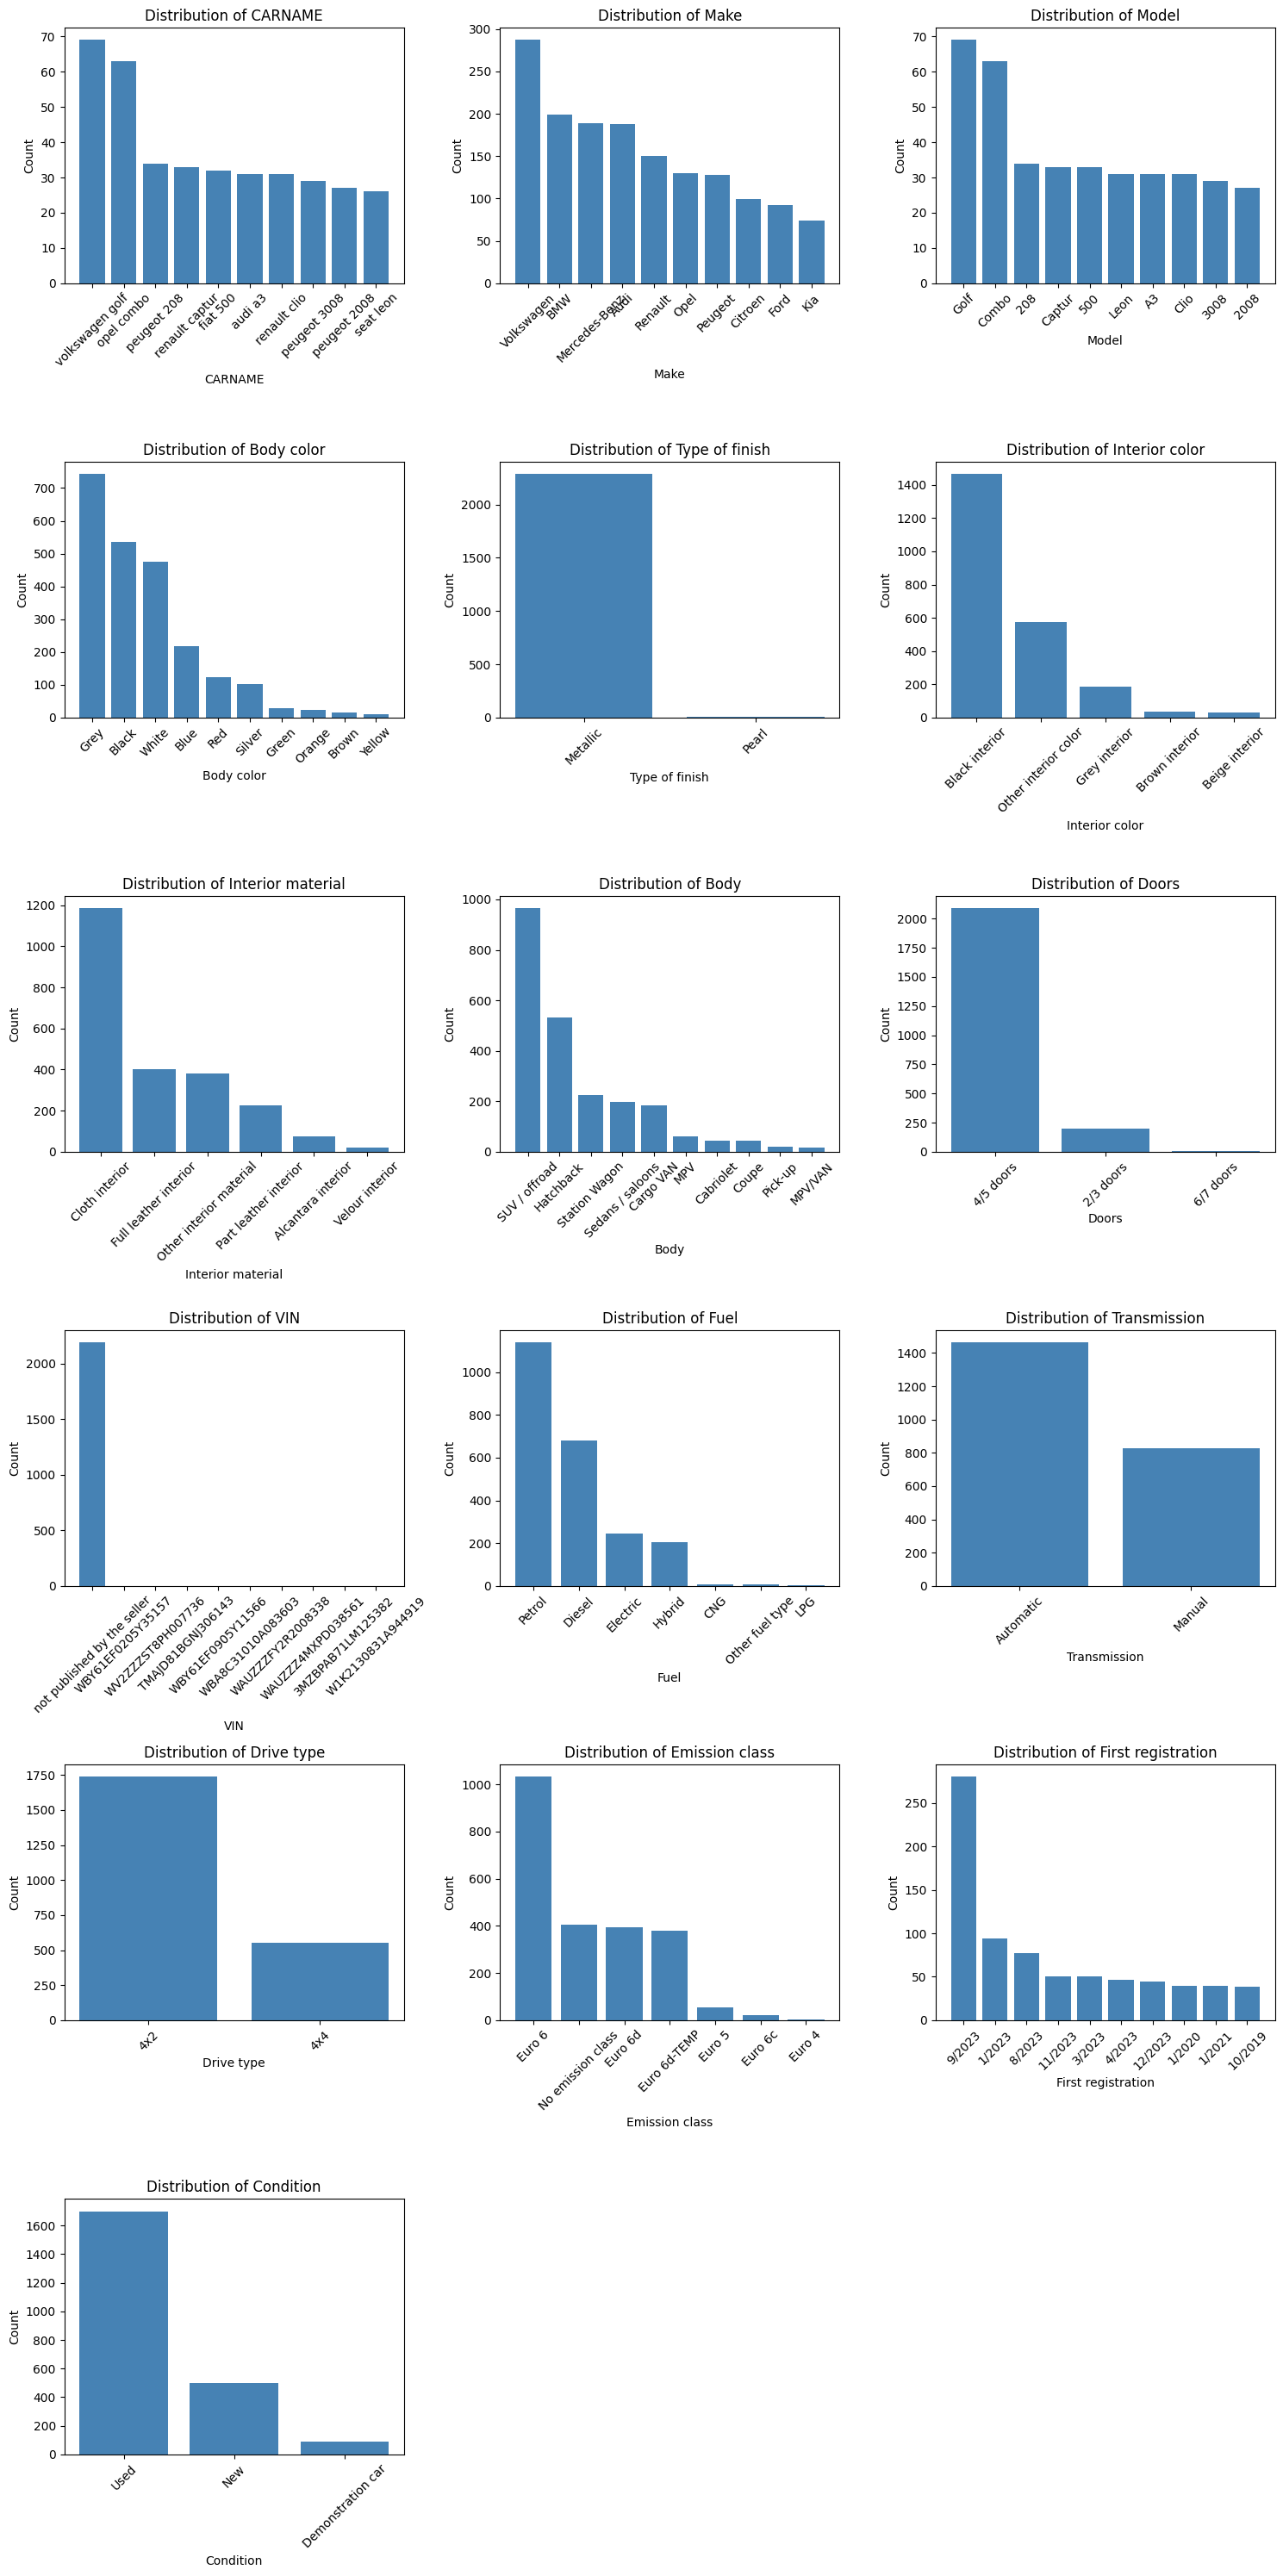

In [29]:
#tạo cate_profile
single_opt = df.select_dtypes(include=['object']).columns
single_opt = single_opt.drop(['Tags'])

profiles = {}
for col in single_opt:
    profiles[col] = df[col].value_counts().to_dict()
    
n = len(profiles)
fig, axs = plt.subplots(n//3 + n%3, 3, figsize=(15, 30))

axs = axs.flatten()

for ax, (col, profile) in zip(axs, profiles.items()):
    # Sort the profile dictionary by value and keep only the top 10
    sorted_profile = dict(sorted(profile.items(), key=lambda item: item[1], reverse=True)[:10])
    ax.bar(sorted_profile.keys(), sorted_profile.values(), color='steelblue')
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Count')
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)

# Remove unused subplots

fig.delaxes(axs[-1])
fig.delaxes(axs[-2])

plt.tight_layout()
plt.show()


Nhận xét:

Do phần lớn giá trị của VIN là not published..., do đó cột này không đem lại thông tin có ích, ta sẽ drop nó

In [30]:
del df['VIN'], df['Type of finish']

Tiếp theo đó, ta sẽ xem xét cột 'Tags'

In [31]:
#Tính phân phố cho các cột multiple selection
def calc_distribution_multiple(column):
    
    # Tách chuỗi bằng dấu phẩy và loại bỏ khoảng trắng thừa và rỗng
    split_series = column.str.split('; ').explode().str.strip()
    split_series = split_series.dropna()

    # Đếm tất cả các giá trị duy nhất
    attribute_distribution = split_series.value_counts()

    # Trả về dictionary với số lượng giá trị khác nhau và phân phối
    return attribute_distribution

# Hiển thị DataFrame
multiple_cate_profile = calc_distribution_multiple(df['Tags'])
multiple_cate_profile

Tags
Heated front seats                1388
LED headlights                    1172
Navigation system                 1076
Apple CarPlay                     1072
Android auto                       984
                                  ... 
Trailer stability assist (TSA)       2
Electric adjustable rear seats       2
Ventilated rear seats                2
Mark Levinson audio                  1
Soft close doors                     1
Name: count, Length: 99, dtype: int64

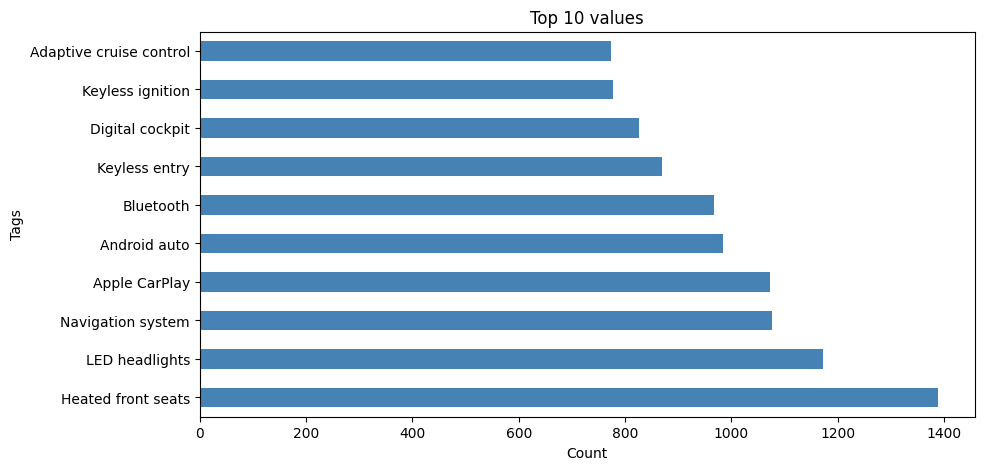

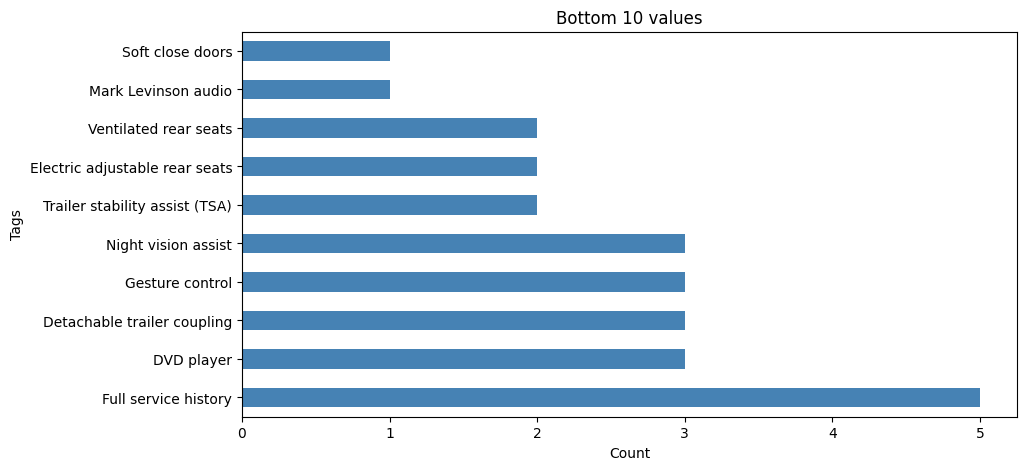

In [32]:
# Lấy 10 giá trị đứng đầu và 10 giá trị đứng cuối
top_10 = multiple_cate_profile.sort_values(ascending=False).head(10)
bottom_10 = multiple_cate_profile.sort_values(ascending=False).tail(10)

# Vẽ biểu đồ cho 10 giá trị đứng đầu
plt.figure(figsize=(10, 5))
top_10.plot(kind='barh', color='steelblue')
plt.title('Top 10 values')
plt.xlabel('Count')
plt.show()

# Vẽ biểu đồ cho 10 giá trị đứng cuối
plt.figure(figsize=(10, 5))
bottom_10.plot(kind='barh', color='steelblue')
plt.title('Bottom 10 values')
plt.xlabel('Count')
plt.show()


Nhận xét: 

In [33]:
#Tính missing value của tất cả các cột trong dataframe
missing_values = df.isnull().mean() * 100

Dữ liệu có hợp lí hay không?

In [34]:
#Kiểm tra lượng khí thải CO2 của các xe điện
electric_cars = df[df['Fuel'] == 'Electricity']
co2_emissions = electric_cars['CO2 emissions(g/km)']
print(co2_emissions)

Series([], Name: CO2 emissions(g/km), dtype: int64)


Lưu dữ liệu đã xử lí xuống file csv

In [35]:
df.to_csv('data/cleaned_data_edited.csv', index = False)